# Executive Briefing

# Reproducible Analysis

## Loading the data

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import re
import os

from matplotlib.colors import ListedColormap

import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from esda.adbscan import ADBSCAN

import random
random.seed(42)    # For reproducibility
np.random.seed(42) # For reproducibility

# Make numeric display a bit neater
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

#visualisation set
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

In [2]:
# Set download URL
#url = 'https://github.com/YHuj20/i2pBriefing/'

#import pandas as pd
#airbnb = pd.read_csv(url, compression='gzip', low_memory=False)

#print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

airbnb = pd.read_csv("Data/listings-May2019.csv", low_memory = False)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80767 entries, 0 to 80766
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              80767 non-null  int64  
 1   name                            80740 non-null  object 
 2   host_id                         80767 non-null  int64  
 3   host_name                       80718 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   80767 non-null  object 
 6   latitude                        80767 non-null  float64
 7   longitude                       80767 non-null  float64
 8   room_type                       80767 non-null  object 
 9   price                           80767 non-null  int64  
 10  minimum_nights                  80767 non-null  int64  
 11  number_of_reviews               80767 non-null  int64  
 12  last_review                     

In [3]:
# Set download URL
#url = 'https://github.com/YHuj20/i2pBriefing/'

#import pandas as pd
#airbnb = pd.read_csv(url, compression='gzip', low_memory=False)

#print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

emptyhomes = pd.read_csv("Data/All-longterm-vacant-dwellings.csv", low_memory = False)
emptyhomes = emptyhomes[emptyhomes['2018'].notna()]
emptyhomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Code    33 non-null     object 
 1   Area    33 non-null     object 
 2   2004    33 non-null     float64
 3   2005    33 non-null     float64
 4   2006    33 non-null     float64
 5   2007    33 non-null     float64
 6   2008    33 non-null     float64
 7   2009    33 non-null     float64
 8   2010    33 non-null     float64
 9   2011    33 non-null     float64
 10  2012    33 non-null     float64
 11  2013    33 non-null     float64
 12  2014    33 non-null     float64
 13  2015    33 non-null     float64
 14  2016    33 non-null     float64
 15  2017    33 non-null     float64
 16  2018    33 non-null     float64
 17  2019    33 non-null     float64
dtypes: float64(16), object(2)
memory usage: 4.9+ KB


In [4]:
# Set download URL
#url = 'https://github.com/YHuj20/i2pBriefing/'

#import pandas as pd
#airbnb = pd.read_csv(url, compression='gzip', low_memory=False)

#print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

totalhomes = pd.read_csv("Data/Total-dwellings-per-borough.csv", low_memory = False)
totalhomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ONS code         33 non-null     object 
 1   Local Authority  33 non-null     object 
 2   2001             33 non-null     float64
 3   2002             33 non-null     float64
 4   2003             33 non-null     float64
 5   2004             33 non-null     float64
 6   2005             33 non-null     float64
 7   2006             33 non-null     float64
 8   2007             33 non-null     float64
 9   2008             33 non-null     float64
 10  2009             33 non-null     float64
 11  2010             33 non-null     float64
 12  2011             33 non-null     float64
 13  2012             33 non-null     float64
 14  2013             33 non-null     float64
 15  2014             33 non-null     float64
 16  2015             33 non-null     float64
 17  2016             3

In [ ]:
#

In [5]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Stylish and bright London apartment in Zone 2,43039,Adriano,nan,Lambeth,51.46,-0.12,Entire home/apt,88,2,183,2018-08-22,1.65,2,290
1,13913,Holiday London DB Room Let-on going,54730,Alina,nan,Islington,51.57,-0.11,Private room,65,1,14,2018-06-17,0.13,3,362
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,nan,Kensington and Chelsea,51.49,-0.17,Entire home/apt,100,3,84,2019-04-22,0.74,1,155
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,nan,Westminster,51.52,-0.14,Entire home/apt,300,3,40,2019-04-20,0.40,13,230
4,24328,Battersea bedroom & office w parking shared ga...,41759,Joe,nan,Wandsworth,51.47,-0.16,Entire home/apt,175,30,92,2016-09-07,0.89,1,332


In [6]:
airbnb.groupby(['neighbourhood','room_type']).count()

id  name  host_id  host_name  \
neighbourhood        room_type                                         
Barking and Dagenham Entire home/apt    94    94       94         94   
                     Private room      214   214      214        214   
                     Shared room         7     7        7          7   
Barnet               Entire home/apt   615   615      615        615   
                     Private room      900   900      900        898   
...                                    ...   ...      ...        ...   
Wandsworth           Private room     1827  1827     1827       1827   
                     Shared room        12    11       12         12   
Westminster          Entire home/apt  6784  6784     6784       6783   
                     Private room     2227  2224     2227       2225   
                     Shared room        51    51       51         51   

                                      neighbourhood_group  latitude  \
neighbourhood        room_type                                        
Barking and Dagenham Entire home/apt                    0        94   
                     Private room                       0       214   
                     Shared room                        0         7   
Barnet               Entire home/apt                    0       615   
                     Private room                       0       900   
...                                                   ...       ...   
Wandsworth           Private room                       0      1827   
                     Shared room                        0        12   
Westminster          Entire home/apt                    0      6784   
                     Private room                       0      2227   
                     Shared room                        0        51   

                                      longitude  price  minimum_nights  \
neighbourhood        room_type                                           
Barking and Dagenham Entire home/apt         94     94              94   
                     Private room           214    214             214   
                     Shared room              7      7               7   
Barnet               Entire home/apt        615    615             615   
                     Private room           900    900             900   
...                                         ...    ...             ...   
Wandsworth           Private room          1827   1827            1827   
                     Shared room             12     12              12   
Westminster          Entire home/apt       6784   6784            6784   
                     Private room          2227   2227            2227   
                     Shared room             51     51              51   

                                      number_of_reviews  last_review  \
neighbourhood        room_type                                         
Barking and Dagenham Entire home/apt                 94           65   
                     Private room                   214          123   
                     Shared room                      7            3   
Barnet               Entire home/apt                615          432   
                     Private room                   900          588   
...                                                 ...          ...   
Wandsworth           Private room                  1827         1325   
                     Shared room                     12            7   
Westminster          Entire home/apt               6784         5094   
                     Private room                  2227         1655   
                     Shared room                     51           41   

                                      reviews_per_month  \
neighbourhood        room_type                            
Barking and Dagenham Entire home/apt                 65   
                     Private room                   123   
                     Shared room           

In [7]:
typecount = airbnb.pivot_table('id', 'neighbourhood', 'room_type', aggfunc='count', fill_value=0)
typecount = typecount.rename(columns={"Entire home/apt" : "Entire_Home" , "Private room": "Private_Room", "Shared room": "Shared_Room"})

In [8]:
typecount['Percent_Entire_Home'] = typecount.Entire_Home/typecount.Entire_Home.sum()
typecount['Percent_Private_Room'] = typecount.Private_Room/typecount.Private_Room.sum()
typecount['Percent_Shared_Room'] = typecount.Shared_Room/typecount.Shared_Room.sum()
typecount['LAD_Name'] = typecount.index
typecount.sample(12, random_state = 42)

room_type,Entire_Home,Private_Room,Shared_Room,Percent_Entire_Home,Percent_Private_Room,Percent_Shared_Room,LAD_Name
neighbourhood,,,,,,,
Wandsworth,2243,1827,12,0.05,0.05,0.02,Wandsworth
Havering,83,135,1,0.00,0.00,0.00,Havering
Richmond upon Thames,625,520,2,0.01,0.01,0.00,Richmond upon Thames
Hounslow,434,559,5,0.01,0.02,0.01,Hounslow
Ealing,694,894,11,0.02,0.03,0.01,Ealing
Enfield,203,372,12,0.00,0.01,0.02,Enfield
Kensington and Chelsea,4667,1024,32,0.10,0.03,0.04,Kensington and Chelsea
Lambeth,2348,2281,49,0.05,0.07,0.07,Lambeth
Hammersmith and Fulham,2504,1512,27,0.06,0.04,0.04,Hammersmith and Fulham


In [9]:
#Join datasets by LA name
#calculate density of entire homes against total homes per borough

typecount=typecount.set_index('LAD_Name').join(totalhomes.set_index('Local Authority'))
typecount['Density_of_Entire_Homes'] = typecount['Entire_Home']/typecount['2018']
typecount['LAD_Name'] = typecount.index
typecount.head()

,Entire_Home,Private_Room,Shared_Room,Percent_Entire_Home,Percent_Private_Room,Percent_Shared_Room,ONS code,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,Density_of_Entire_Homes,LAD_Name
LAD_Name,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,94,214,7,0.00,0.01,0.01,E09000002,"68,298.00","68,525.70","68,837.40",...,"71,079.00","71,431.00","71,937.00","72,668.00","73,182.00","73,914.00","74,510.00","74,923.00",0.00,Barking and Dagenham
Barnet,615,900,19,0.01,0.03,0.03,E09000003,"130,515.00","130,800.60","131,883.20",...,"139,346.00","141,460.65","142,834.65","143,947.65","145,271.65","146,729.65","148,528.65","150,736.65",0.00,Barnet
Bexley,64,176,2,0.00,0.01,0.00,E09000004,"91,606.00","91,907.60","92,223.20",...,"95,037.00","95,240.00","95,658.00","96,186.00","96,996.00","96,864.00","97,628.00","97,905.00",0.00,Bexley
Brent,1115,1212,48,0.02,0.03,0.07,E09000005,"101,427.00","102,828.10","103,846.20",...,"112,083.00","112,643.00","113,305.00","114,039.00","115,598.00","116,649.00","118,013.00","118,707.00",0.01,Brent
Bromley,278,368,5,0.01,0.01,0.01,E09000006,"128,717.00","128,974.20","129,314.40",...,"135,036.00","135,612.00","136,304.00","136,453.00","136,864.00","137,564.00","138,422.00","138,976.00",0.00,Bromley


In [12]:
#Entire Homes Locations
entirehomeslatlong = airbnb[['latitude', 'longitude', 'room_type']].copy()
entirehomeslatlong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80767 entries, 0 to 80766
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   80767 non-null  float64
 1   longitude  80767 non-null  float64
 2   room_type  80767 non-null  object 
dtypes: float64(2), object(1)
memory usage: 1.8+ MB


## Mapping Entire AirBnB Homes

In [10]:
import os
from requests import get
from urllib.parse import urlparse

def cache_data(src:str, dest:str) -> str:
    """Downloads and caches a remote file locally.
    
    The function sits between the 'read' step of a pandas or geopandas
    data frame and downloading the file from a remote location. The idea
    is that it will save it locally so that you don't need to remember to
    do so yourself. Subsequent re-reads of the file will return instantly
    rather than downloading the entire file for a second or n-th itme.
    
    Parameters
    ----------
    src : str
        The remote *source* for the file, any valid URL should work.
    dest : str
        The *destination* location to save the downloaded file.
        
    Returns
    -------
    str
        A string representing the local location of the file.
    """
    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) # Destination filename
    
    # Check if dest+filename does *not* exist -- 
    # that would mean we have to download it!
    if not os.path.isfile(dfn):
        
        print(f"{dfn} not found, downloading!")

        # Convert the path back into a list (without)
        # the filename -- we need to check that directories
        # exist first.
        path = os.path.split(dest)
        
        # Create any missing directories in dest(ination) path
        # -- os.path.join is the reverse of split (as you saw above)
        # but it doesn't work with lists... so I had to google how
        # to use the 'splat' operator! os.makedirs creates missing
        # directories in a path automatically.
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
            
        # Download and write the file
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print('Done downloading...')

    else:
        print(f"Found {dfn} locally!")

    return dfn

In [11]:
ddir  = os.path.join('data','geo') # destination directory
spath = 'https://github.com/jreades/i2p/blob/master/data/src/' # source path

boros = gpd.read_file( cache_data(spath+'Boroughs.gpkg?raw=true', ddir) )
print('Done.')

Found data/geo/Boroughs.gpkg locally!
Done.


In [12]:
#checking projection
print(boros.crs)

epsg:27700


<AxesSubplot:>

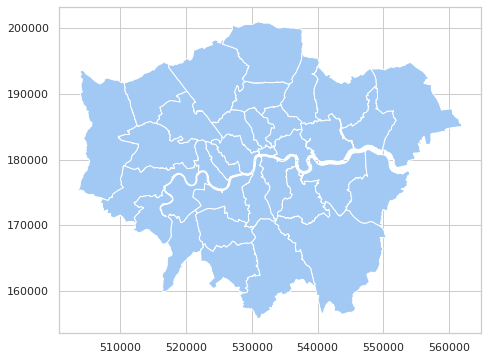

In [13]:
boros.plot()

In [14]:
boros.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
0,Kingston upon Thames,E09000021,"3,726.12",0.00,F,"MULTIPOLYGON (((516401.600 160201.800, 516407...."
1,Croydon,E09000008,"8,649.44",0.00,F,"MULTIPOLYGON (((535009.200 159504.700, 535005...."
2,Bromley,E09000006,"15,013.49",0.00,F,"MULTIPOLYGON (((540373.600 157530.400, 540361...."
3,Hounslow,E09000018,"5,658.54",60.76,F,"MULTIPOLYGON (((521975.800 178100.000, 521967...."
4,Ealing,E09000009,"5,554.43",0.00,F,"MULTIPOLYGON (((510253.500 182881.600, 510249...."


In [15]:
#creating the geodataframe
geotypes=typecount.set_index('ONS code').join(boros.set_index('GSS_CODE'))
gdf = gpd.GeoDataFrame(geotypes, crs = "EPSG:27700")

### Mapping % of Entire Homes listings in May 2019

<AxesSubplot:>

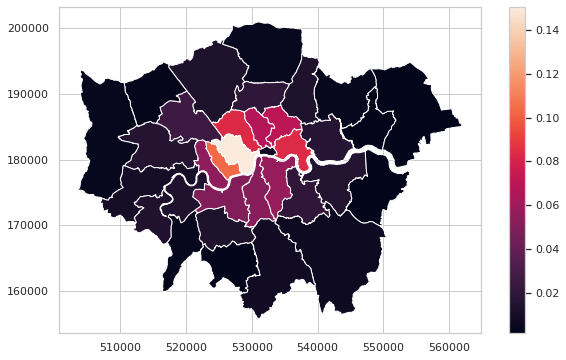

In [16]:
fig, ax = plt.subplots(1,1)

gdf.plot(column = 'Percent_Entire_Home',
        ax=ax, 
        legend=True)
        #legend = {'label':"% of London's Entire Homes Listings", 'orientation':"horizontal"})

<AxesSubplot:>

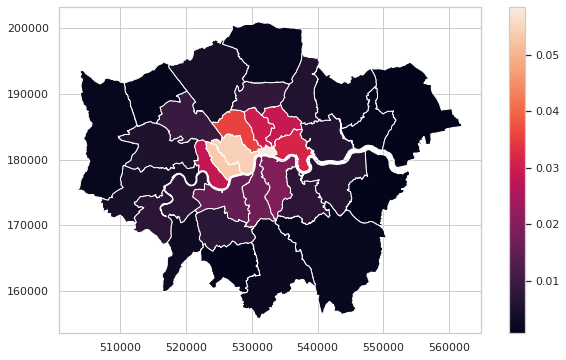

In [17]:
fig, ax = plt.subplots(1,1)

gdf.plot(column = 'Density_of_Entire_Homes',
        ax=ax, 
        legend=True)
        #legend = {'label':"% of London's Entire Homes Listings", 'orientation':"horizontal"})

Evidentally, the majority of entire homes listings are in Westminster

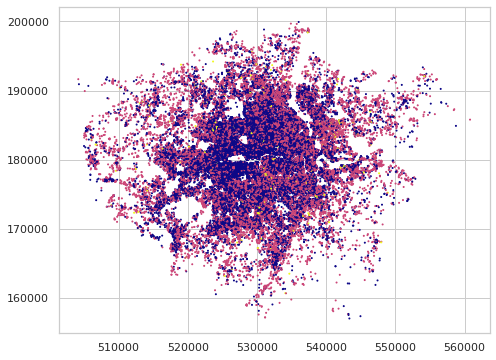

In [15]:
#creating geodataframe of listings

entirehomesgdf = gpd.GeoDataFrame(entirehomeslatlong, 
      geometry=gpd.points_from_xy(entirehomeslatlong['longitude'], entirehomeslatlong['latitude'], crs='epsg:4326'))
entirehomesgdf = entirehomesgdf.to_crs('epsg:27700')
entirehomesgdf.plot(column='room_type', cmap='plasma', markersize=1, figsize=(8,6));

## Mapping Empty Homes in London

In [19]:
emptyhomes.head()

,Code,Area,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,00AA,City of London,119.00,86.00,55.00,54.00,47.00,24.00,23.00,45.00,33.00,47.00,48.00,44.00,48.00,158.00,244.00,273.00
1,00AB,Barking and Dagenham,434.00,513.00,893.00,"1,181.00",750.00,627.00,557.00,468.00,295.00,242.00,259.00,202.00,110.00,115.00,106.00,206.00
2,00AC,Barnet,"1,654.00","1,805.00","1,604.00","1,576.00","1,704.00","1,719.00","1,525.00","1,390.00","1,095.00","1,136.00","1,129.00","1,249.00","1,100.00","1,048.00","1,065.00","1,113.00"
3,00AD,Bexley,898.00,932.00,823.00,911.00,756.00,755.00,670.00,779.00,473.00,527.00,334.00,395.00,387.00,475.00,488.00,645.00
4,00AE,Brent,"1,294.00","1,231.00","1,214.00","1,162.00",830.00,733.00,595.00,629.00,610.00,567.00,540.00,405.00,453.00,354.00,405.00,336.00


In [20]:
emptyhomes['Density of Empty Homes'] = emptyhomes['2018']/totalhomes['2018']
emptyhomes.columns = emptyhomes.columns.map(lambda x: str(x) + '_empty')
emptyhomes.head()

,Code_empty,Area_empty,2004_empty,2005_empty,2006_empty,2007_empty,2008_empty,2009_empty,2010_empty,2011_empty,2012_empty,2013_empty,2014_empty,2015_empty,2016_empty,2017_empty,2018_empty,2019_empty,Density of Empty Homes_empty
0,00AA,City of London,119.00,86.00,55.00,54.00,47.00,24.00,23.00,45.00,33.00,47.00,48.00,44.00,48.00,158.00,244.00,273.00,0.04
1,00AB,Barking and Dagenham,434.00,513.00,893.00,"1,181.00",750.00,627.00,557.00,468.00,295.00,242.00,259.00,202.00,110.00,115.00,106.00,206.00,0.00
2,00AC,Barnet,"1,654.00","1,805.00","1,604.00","1,576.00","1,704.00","1,719.00","1,525.00","1,390.00","1,095.00","1,136.00","1,129.00","1,249.00","1,100.00","1,048.00","1,065.00","1,113.00",0.01
3,00AD,Bexley,898.00,932.00,823.00,911.00,756.00,755.00,670.00,779.00,473.00,527.00,334.00,395.00,387.00,475.00,488.00,645.00,0.00
4,00AE,Brent,"1,294.00","1,231.00","1,214.00","1,162.00",830.00,733.00,595.00,629.00,610.00,567.00,540.00,405.00,453.00,354.00,405.00,336.00,0.00


In [21]:
geotypes.head()

,Entire_Home,Private_Room,Shared_Room,Percent_Entire_Home,Percent_Private_Room,Percent_Shared_Room,2001,2002,2003,2004,...,2016,2017,2018,Density_of_Entire_Homes,LAD_Name,NAME,HECTARES,NONLD_AREA,ONS_INNER,geometry
ONS code,,,,,,,,,,,,,,,,,,,,,
E09000002,94,214,7,0.00,0.01,0.01,"68,298.00","68,525.70","68,837.40","68,899.10",...,"73,914.00","74,510.00","74,923.00",0.00,Barking and Dagenham,Barking and Dagenham,"3,779.93",169.15,F,"MULTIPOLYGON (((543905.400 183199.100, 543905...."
E09000003,615,900,19,0.01,0.03,0.03,"130,515.00","130,800.60","131,883.20","132,855.80",...,"146,729.65","148,528.65","150,736.65",0.00,Barnet,Barnet,"8,674.84",0.00,F,"MULTIPOLYGON (((524579.900 198355.200, 524594...."
E09000004,64,176,2,0.00,0.01,0.00,"91,606.00","91,907.60","92,223.20","92,949.80",...,"96,864.00","97,628.00","97,905.00",0.00,Bexley,Bexley,"6,428.65",370.62,F,"MULTIPOLYGON (((547226.200 181299.300, 547320...."
E09000005,1115,1212,48,0.02,0.03,0.07,"101,427.00","102,828.10","103,846.20","104,454.30",...,"116,649.00","118,013.00","118,707.00",0.01,Brent,Brent,"4,323.27",0.00,F,"MULTIPOLYGON (((525201.000 182512.600, 525181...."
E09000006,278,368,5,0.01,0.01,0.01,"128,717.00","128,974.20","129,314.40","129,808.60",...,"137,564.00","138,422.00","138,976.00",0.00,Bromley,Bromley,"15,013.49",0.00,F,"MULTIPOLYGON (((540373.600 157530.400, 540361...."


In [22]:
#joining empty homes to the geodataframe
geotypes=geotypes.set_index('LAD_Name').join(emptyhomes.set_index('Area_empty'))
gdf = gpd.GeoDataFrame(geotypes, crs = "EPSG:27700")

<AxesSubplot:>

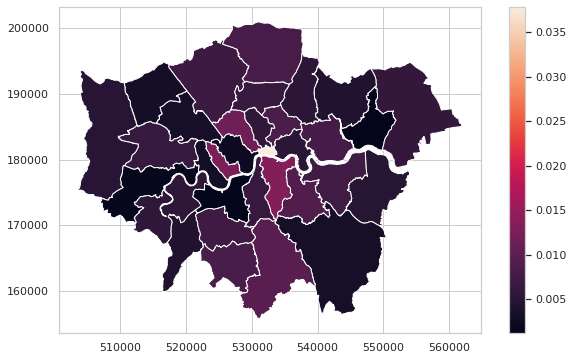

In [23]:
fig, ax = plt.subplots(1,1)

gdf.plot(column = 'Density of Empty Homes_empty',
        ax=ax, 
        legend=True)
        #legend = {'label':"% of London's Entire Homes Listings", 'orientation':"horizontal"})

## Mapping Empty Homes and Airbnb Entire Homes Listings

In [24]:
geotypes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Barking and Dagenham to Westminster
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Entire_Home                   33 non-null     int64   
 1   Private_Room                  33 non-null     int64   
 2   Shared_Room                   33 non-null     int64   
 3   Percent_Entire_Home           33 non-null     float64 
 4   Percent_Private_Room          33 non-null     float64 
 5   Percent_Shared_Room           33 non-null     float64 
 6   2001                          33 non-null     float64 
 7   2002                          33 non-null     float64 
 8   2003                          33 non-null     float64 
 9   2004                          33 non-null     float64 
 10  2005                          33 non-null     float64 
 11  2006                          33 non-null     float64 
 12  2007                         

In [25]:
geotypes['Total empty and entire homes 2018'] = geotypes['Entire_Home']+geotypes['2018_empty']
geotypes['Percent Unavailable 2018'] = geotypes['Total empty and entire homes 2018'] / geotypes['2018']
geotypes['Total empty and entire homes 2019'] = geotypes['Entire_Home']+geotypes['2019_empty']
geotypes['Percent Unavailable 2019'] = geotypes['Total empty and entire homes 2019'] / geotypes['2018']
geotypes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Barking and Dagenham to Westminster
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Entire_Home                        33 non-null     int64   
 1   Private_Room                       33 non-null     int64   
 2   Shared_Room                        33 non-null     int64   
 3   Percent_Entire_Home                33 non-null     float64 
 4   Percent_Private_Room               33 non-null     float64 
 5   Percent_Shared_Room                33 non-null     float64 
 6   2001                               33 non-null     float64 
 7   2002                               33 non-null     float64 
 8   2003                               33 non-null     float64 
 9   2004                               33 non-null     float64 
 10  2005                               33 non-null     float64 
 11  2006                    

<AxesSubplot:>

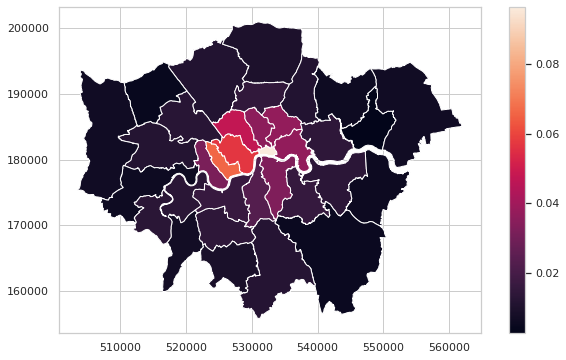

In [26]:
gdf = gpd.GeoDataFrame(geotypes, crs = "EPSG:27700")

fig, ax = plt.subplots(1,1)

gdf.plot(column = 'Percent Unavailable 2018',
        ax=ax, 
        legend=True)
        #legend = {'label':"% of London's Entire Homes Listings", 'orientation':"horizontal"})

<AxesSubplot:>

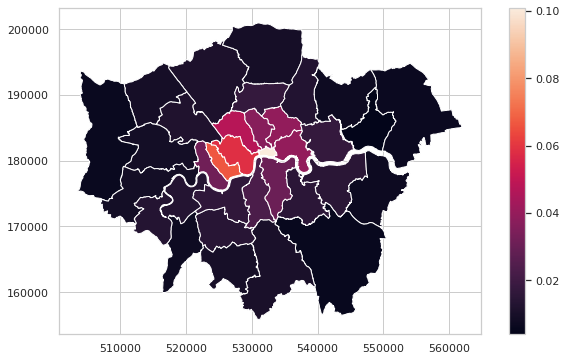

In [38]:
gdf = gpd.GeoDataFrame(geotypes, crs = "EPSG:27700")

fig, ax = plt.subplots(1,1)

gdf.plot(column = 'Percent Unavailable 2019',
        ax=ax, 
        legend=True)
        #legend = {'label':"% of London's Entire Homes Listings", 'orientation':"horizontal"})

## Compare the above to the housing shortage

In [32]:
#Plot graphs of empty homes year on year 

emptyhomes.loc["Total"] = emptyhomes.sum(numeric_only=True)
emptyhomes


,Code_empty,Area_empty,2004_empty,2005_empty,2006_empty,2007_empty,2008_empty,2009_empty,2010_empty,2011_empty,2012_empty,2013_empty,2014_empty,2015_empty,2016_empty,2017_empty,2018_empty,2019_empty,Density of Empty Homes_empty
0,00AA,City of London,119.00,86.00,55.00,54.00,47.00,24.00,23.00,45.00,33.00,47.00,48.00,44.00,48.00,158.00,244.00,273.00,0.04
1,00AB,Barking and Dagenham,434.00,513.00,893.00,"1,181.00",750.00,627.00,557.00,468.00,295.00,242.00,259.00,202.00,110.00,115.00,106.00,206.00,0.00
2,00AC,Barnet,"1,654.00","1,805.00","1,604.00","1,576.00","1,704.00","1,719.00","1,525.00","1,390.00","1,095.00","1,136.00","1,129.00","1,249.00","1,100.00","1,048.00","1,065.00","1,113.00",0.01
3,00AD,Bexley,898.00,932.00,823.00,911.00,756.00,755.00,670.00,779.00,473.00,527.00,334.00,395.00,387.00,475.00,488.00,645.00,0.00
4,00AE,Brent,"1,294.00","1,231.00","1,214.00","1,162.00",830.00,733.00,595.00,629.00,610.00,567.00,540.00,405.00,453.00,354.00,405.00,336.00,0.00
5,00AF,Bromley,"1,506.00","1,437.00","1,253.00","1,138.00","1,047.00","1,002.00",922.00,840.00,728.00,709.00,668.00,696.00,591.00,575.00,482.00,554.00,0.00
6,00AG,Camden,"1,503.00","1,338.00","1,056.00","1,079.00","1,125.00","1,207.00","1,163.00","1,053.00",964.00,"1,286.00","1,146.00","1,138.00","1,114.00","1,142.00","1,210.00","1,241.00",0.01
7,00AH,Croydon,"2,978.00","2,049.00","2,721.00","1,822.00","1,640.00","1,635.00","1,476.00","1,321.00","1,362.00",294.00,741.00,"1,022.00","1,216.00","1,264.00","1,521.00","1,340.00",0.01
8,00AJ,Ealing,"1,215.00","1,179.00","1,091.00","1,131.00","1,144.00","1,194.00",938.00,656.00,375.00,342.00,153.00,667.00,695.00,801.00,850.00,516.00,0.01
9,00AK,Enfield,"2,848.00","2,661.00","3,028.00","1,551.00",905.00,894.00,"1,015.00","1,057.00",764.00,847.00,"1,041.00",817.00,"1,085.00",917.00,"1,026.00",992.00,0.01


<AxesSubplot:>

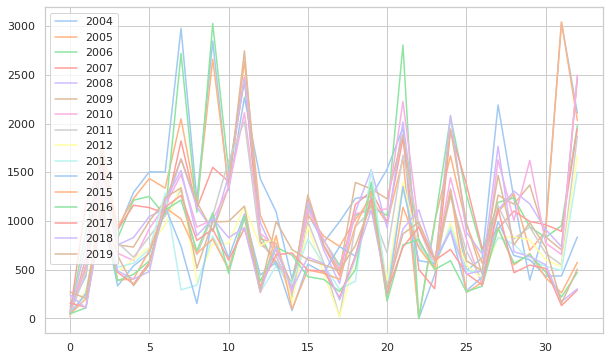

In [18]:
x = emptyhomes.index
emptyhomes.plot.line()

# 